In [ ]:
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from google.colab import files

In [ ]:
upload = files.upload()

Saving iris_data.csv to iris_data.csv


In [ ]:
df = pd.read_csv('iris_data.csv')
df = df.iloc[:,0:5]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
y = df.iloc[:,-1:]
X = df.iloc[:,0:4]

In [ ]:
#Spliting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
#Preprocessing with dataset
l_en = LabelEncoder()
y_train = l_en.fit_transform(y_train)
y_test = l_en.fit_transform(y_test)
#Standardizing the feature variables
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Applying DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)
#Prediction the test dataset
y_test_pred = classifier.predict(X_test)
print('Predicted: ',y_test_pred)
print('Actual: ',y_test)

Predicted:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Actual:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))
print('Accuracy Score: ',round(accuracy_score(y_test,y_test_pred),3))

Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy Score:  0.974


In [ ]:
print(tree.export_text(classifier))

|--- feature_3 <= -0.54
|   |--- class: 0
|--- feature_3 >  -0.54
|   |--- feature_2 <= 0.64
|   |   |--- feature_3 <= 0.55
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.55
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- class: 1
|   |--- feature_2 >  0.64
|   |   |--- feature_3 <= 0.68
|   |   |   |--- feature_3 <= 0.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.55
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.68
|   |   |   |--- class: 2



[Text(0.4, 0.9, 'petal_width <= -0.542\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'), Text(0.3, 0.7, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'), Text(0.5, 0.7, 'petal_length <= 0.644\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'), Text(0.2, 0.5, 'petal_width <= 0.549\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'), Text(0.1, 0.3, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'), Text(0.3, 0.3, 'sepal_width <= 0.111\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'), Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'), Text(0.8, 0.5, 'petal_width <= 0.677\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'), Text(0.7, 0.3, 'petal_width <= 0.549\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'), Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'), Text(0.9, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 

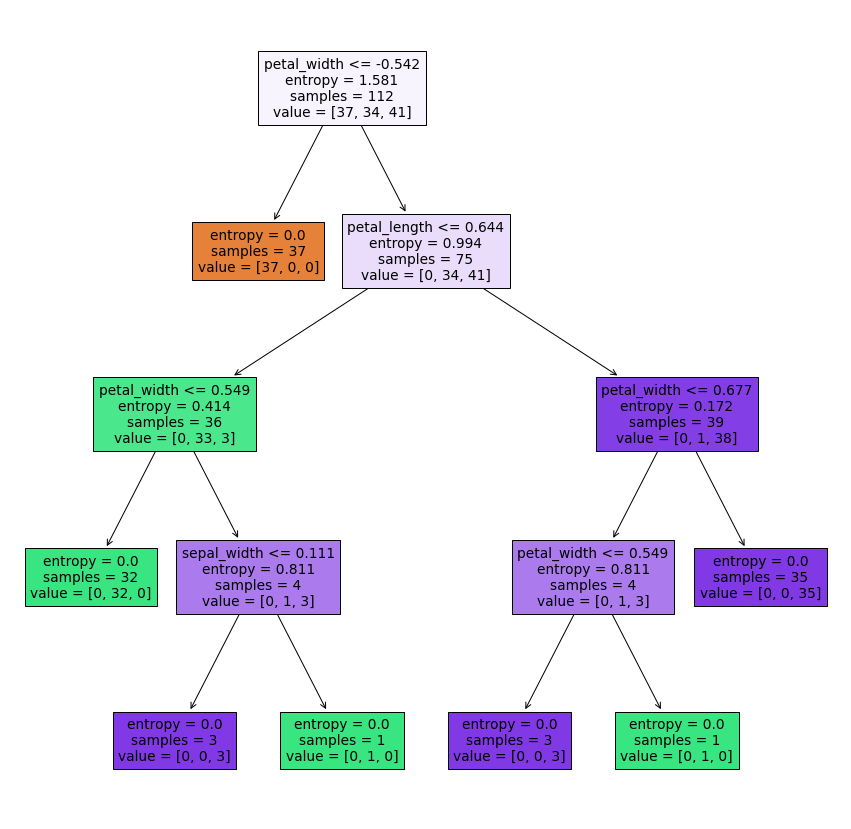

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
print(tree.plot_tree(classifier, feature_names=X.columns, filled=True))